In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\Admin'

# Data Handling

In [3]:
dataset=pd.read_csv('C://Users/Admin/Desktop/Practisse/diamonds.csv')

In [4]:
dataset.head().append(dataset.tail())

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
dataset.shape

(53940, 11)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
dataset.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# There's an unecessary column which needs to be dropped

In [8]:
dataset.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
dataset.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Missing values

In [11]:
missing=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>0 ]
missing

[]

There are no null values

# Data Analysis

In [12]:
numerical_feature=[feature for feature in dataset.columns if dataset[feature].dtype !='O']
numerical_feature

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [13]:
print('Number of numerical features {}'. format(len(numerical_feature)))

Number of numerical features 7


In [14]:
categorical=[feature for feature in dataset.columns if feature not in numerical_feature]
categorical

['cut', 'color', 'clarity']

In [15]:
print('Number of categorical features {}'. format(len(categorical)))

Number of categorical features 3


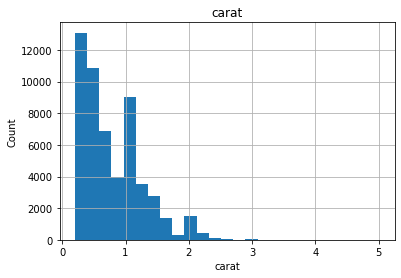

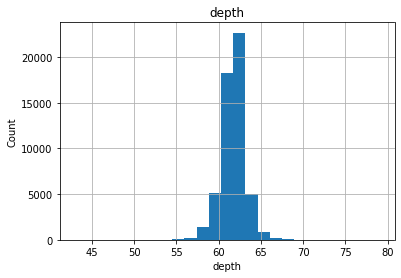

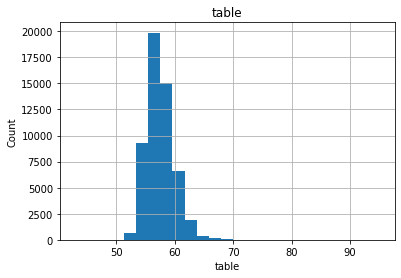

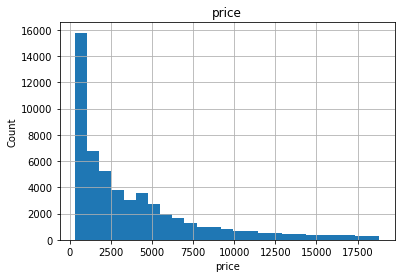

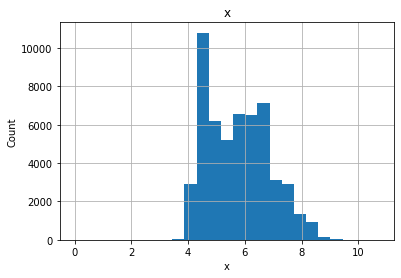

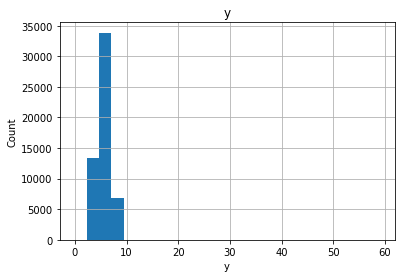

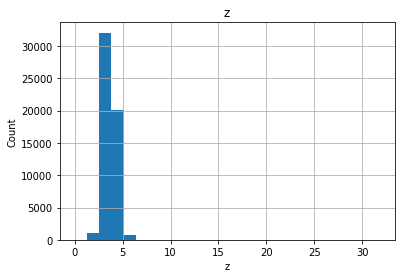

In [16]:
for feature in numerical_feature:
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Univariate and Bivariate Data Exploration

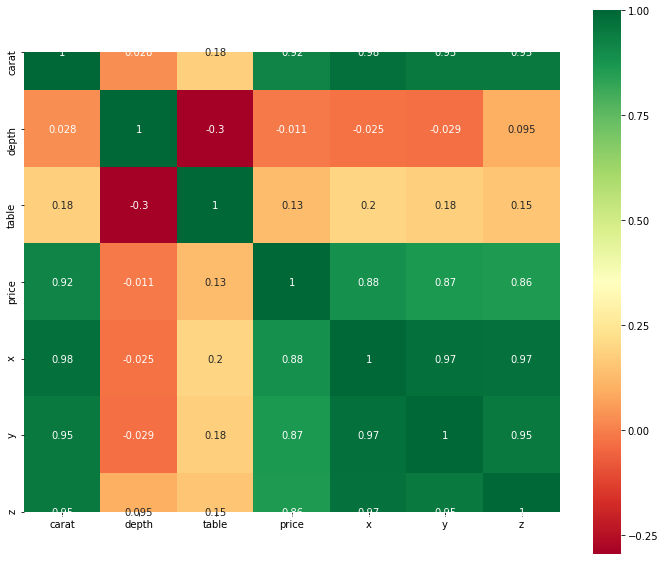

In [17]:
plt.figure(figsize=(12,10))
corr=dataset.corr()
sns.heatmap(data=corr,annot=True,square=True,cmap='RdYlGn')

Few observations from the above plot
x,y, and z have a very strong relation with price but surprisingly depth (which comes from x,y, and z) doesn't has a significant relation with price.
Carat has a strong relation with price
Table doesn't have a significant relation with price or any other variable as well ( We can try dropping that when making the model)

<Figure size 720x720 with 0 Axes>

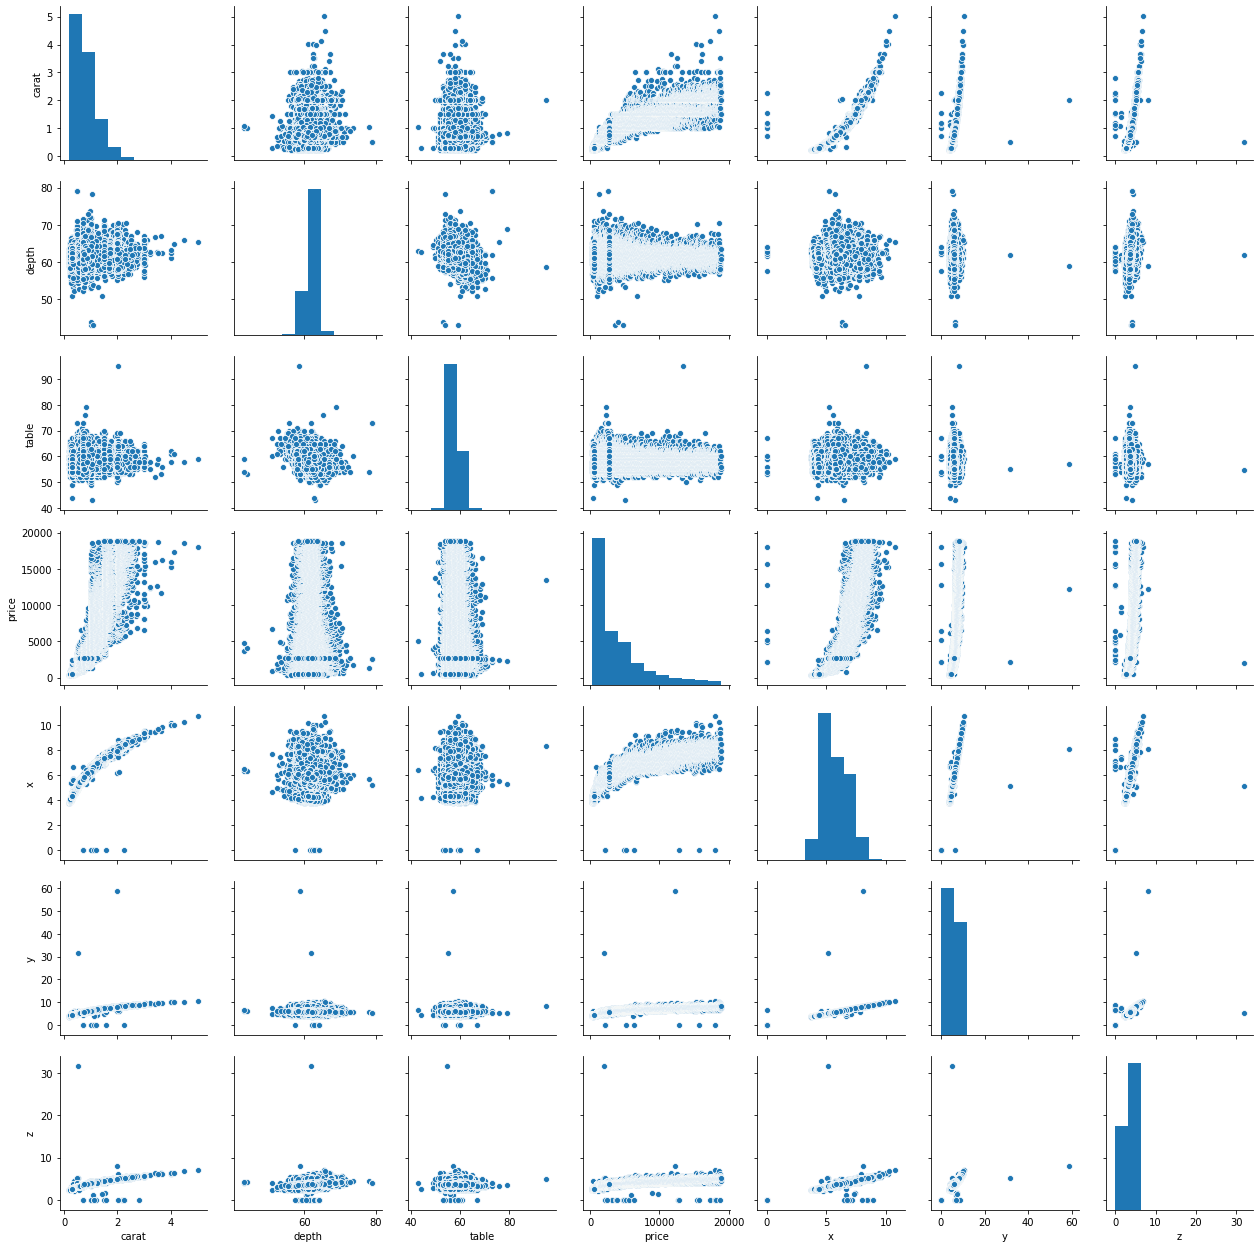

In [18]:
plt.figure(figsize=(10,10))
sns.pairplot(data=dataset,kind='scatter')

In [19]:
dataset.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [20]:
dataset.describe(include=['O'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


The minimum values for x,y and z here are 0 but it is not possible because according to the data description they are the length, width and depth

In [21]:
print('The number of zeros in x label are {}'.format(len(dataset[dataset['x']==0])))
print('The number of zeros in y label are {}'.format(len(dataset[dataset['y']==0])))
print('The number of zeros in z label are {}'.format(len(dataset[dataset['z']==0])))

The number of zeros in x label are 8
The number of zeros in y label are 7
The number of zeros in z label are 20


''' A zero value in these rows means missing data so we can replace the zeros with nan. Another thing to notice is that the depth column doesn't have a single zero value. We know that depth is calculated using the three parameters only'''

In [22]:
dataset[['x','y','z']]=dataset[['x','y','z']].replace(0,np.NaN)

In [23]:
dataset.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

# Treatment of data for missing values

In [24]:
dataset.fillna(dataset.mean(),inplace=True)

In [25]:
dataset.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [26]:
dataset.shape

(53940, 10)

In [27]:
dataset.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.732007,5.735270,3.540046
std,0.474011,1.432621,2.234491,3989.439738,1.119587,1.140265,0.702400
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


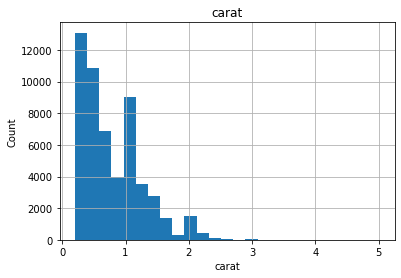

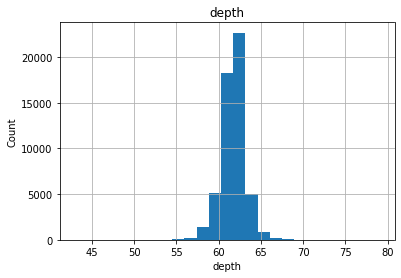

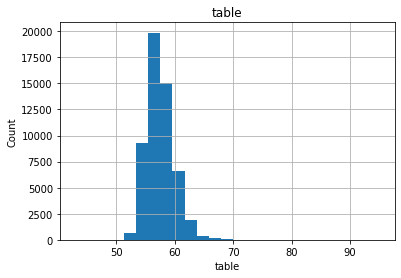

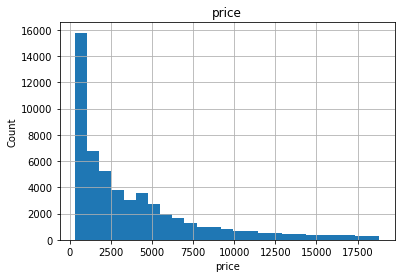

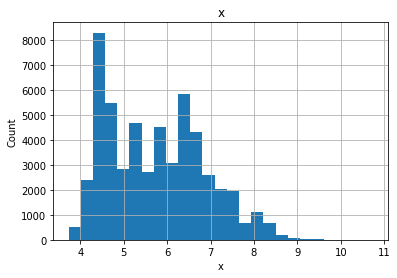

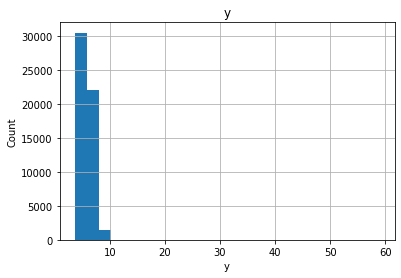

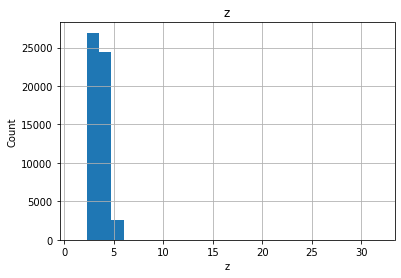

In [28]:
for feature in numerical_feature:
    dataset[feature].hist(bins=25,)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [29]:
#Data is Skewed  hence applying log 

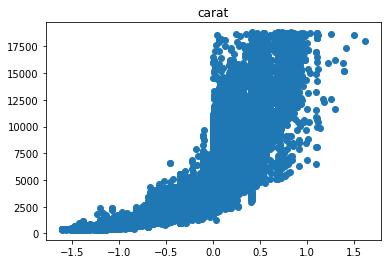

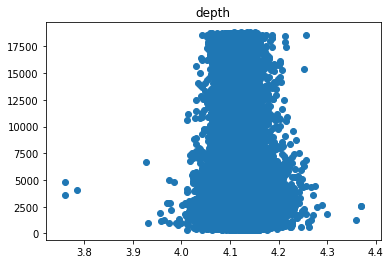

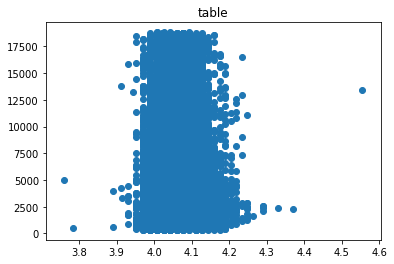

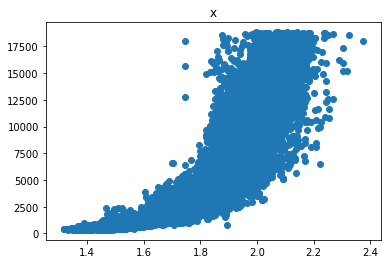

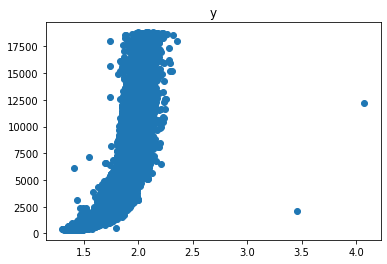

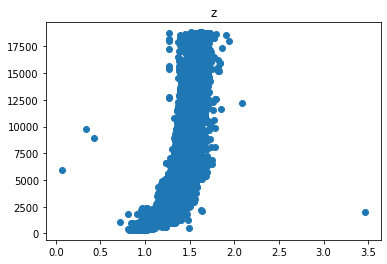

In [30]:
for feature in numerical_feature:
    if feature not in ['price']:
        data=dataset.copy()
        data[feature]=np.log(data[feature])
        plt.scatter(data[feature],data['price'])
        plt.title(feature)
        plt.show()
        
   

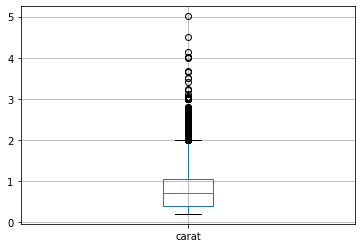

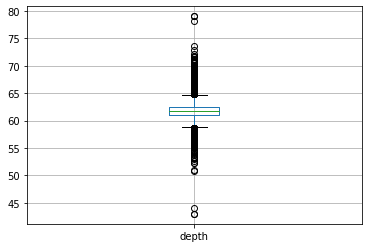

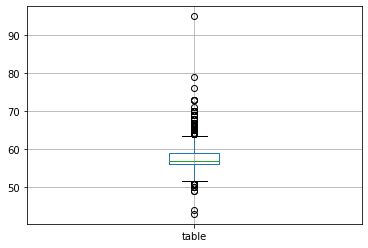

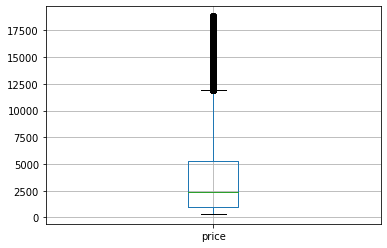

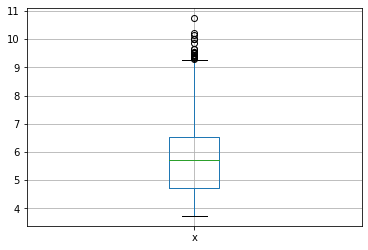

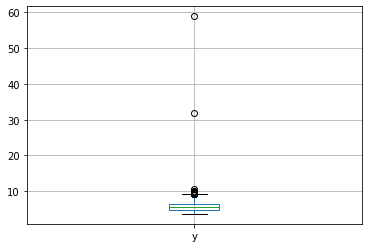

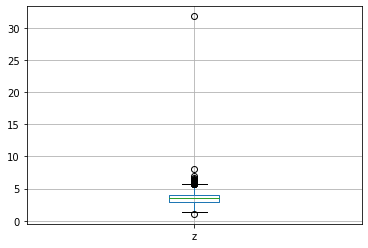

In [31]:
for feature in numerical_feature:
    dataset.boxplot(column=feature)
    plt.show()

# Categorical Data Essense

In [32]:
categorical

['cut', 'color', 'clarity']

In [33]:
pd.crosstab(dataset['cut'],dataset['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


In [34]:
dataset[categorical].head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [35]:
dataset['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [36]:
dataset['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [37]:
dataset['cut'].nunique()

5

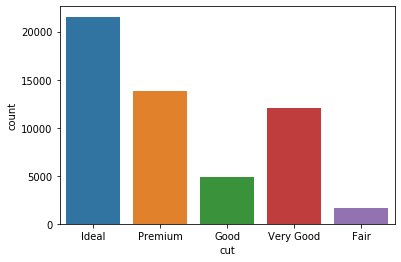

In [38]:
sns.countplot(dataset['cut'])

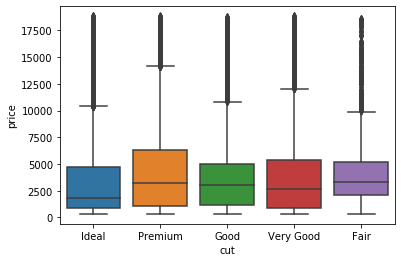

In [39]:
sns.boxplot(x='cut',y='price',data=dataset)

in the cut category, be it ideal, fair or any other type, there are diamonds in those categories with high prices

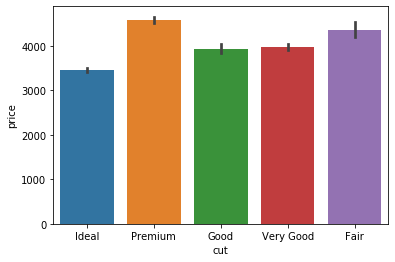

In [40]:
sns.barplot(x='cut',y='price',data=dataset)

In [41]:
categorical

['cut', 'color', 'clarity']

In [42]:
dataset['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

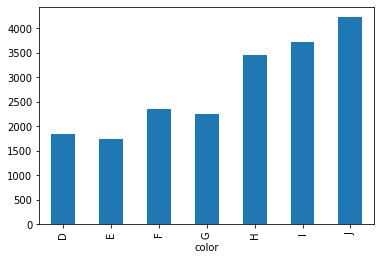

In [43]:
dataset.groupby('color')['price'].median().plot.bar()

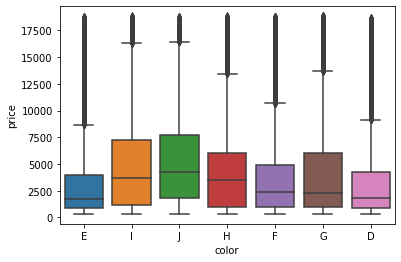

In [44]:
sns.boxplot(x='color', y='price', data=dataset)

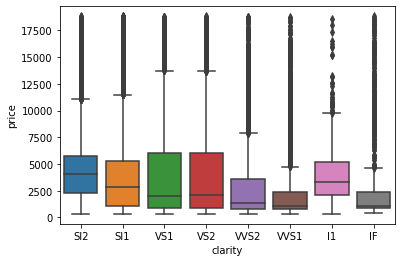

In [45]:
sns.boxplot(x='clarity',y='price', data=dataset)

Mostly the median prices are very low as compared to the the highest price values for all the categories in colors, cut and clarity. The upper quartile is bigger. It shows that whichever category it may be there's a variety of diamonds that are still very expensive.

# Treatment Techniques for Categorical Data

In [46]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [47]:
dataset=pd.get_dummies(dataset)

In [48]:
dataset.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [49]:
dataset.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [50]:
cols = dataset.columns
diamond_clean_data = pd.DataFrame(dataset,columns= cols)
diamond_clean_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


# Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [52]:
new_numerical=[feature for feature in numerical_feature if feature not in ['price']]

In [53]:
new_numerical

['carat', 'depth', 'table', 'x', 'y', 'z']

In [54]:
numerical=pd.DataFrame(data=scaler.fit_transform(dataset[new_numerical]),columns=['carat','depth','table','x', 'y','z'])

In [55]:
numerical.head()

,carat,depth,table,x,y,z
0,-1.198168,-0.174092,-1.099672,-1.591680,-1.539368,-1.580377
1,-1.240361,-1.360738,1.585529,-1.645271,-1.662147,-1.751221
2,-1.198168,-3.385019,3.375663,-1.502360,-1.460438,-1.751221
3,-1.071587,0.454133,0.242928,-1.368381,-1.320118,-1.295636
4,-1.029394,1.082358,0.242928,-1.243334,-1.214879,-1.124792


In [56]:
diamond_clean_data.drop(columns=['carat','depth','table','x','y','z'],inplace=True)

In [57]:
diamond_clean_data.columns

Index(['price', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [58]:
diamond_clean=pd.concat([diamond_clean_data,numerical],axis=1)
diamond_clean.head()

,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z
0,326,0,0,1,0,0,0,1,0,0,...,0,0,0,0,-1.198168,-0.174092,-1.099672,-1.591680,-1.539368,-1.580377
1,326,0,0,0,1,0,0,1,0,0,...,0,0,0,0,-1.240361,-1.360738,1.585529,-1.645271,-1.662147,-1.751221
2,327,0,1,0,0,0,0,1,0,0,...,1,0,0,0,-1.198168,-3.385019,3.375663,-1.502360,-1.460438,-1.751221
3,334,0,0,0,1,0,0,0,0,0,...,0,1,0,0,-1.071587,0.454133,0.242928,-1.368381,-1.320118,-1.295636
4,335,0,1,0,0,0,0,0,0,0,...,0,0,0,0,-1.029394,1.082358,0.242928,-1.243334,-1.214879,-1.124792


Let's take a look at the correlation heatmap
One cool thing is that when we plot before and after standardisation the stats are still that same which is just yet another sign of how useful standardisation is

In [59]:
correlation=diamond_clean.corr()

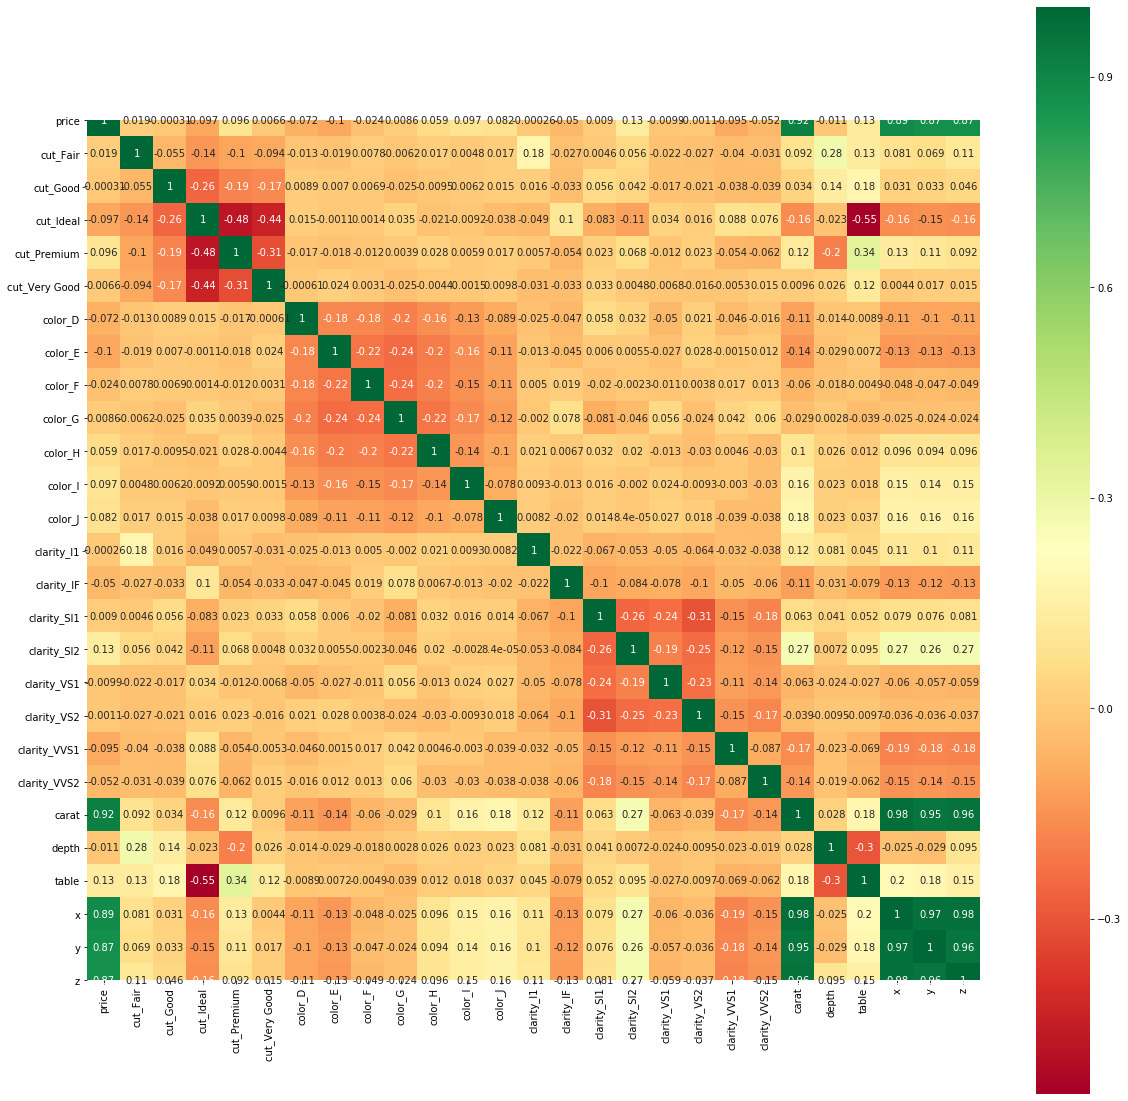

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(data=correlation,square=True,annot=True,cmap='RdYlGn')

# Model Training

In [61]:
diamond_clean.head()

,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z
0,326,0,0,1,0,0,0,1,0,0,...,0,0,0,0,-1.198168,-0.174092,-1.099672,-1.591680,-1.539368,-1.580377
1,326,0,0,0,1,0,0,1,0,0,...,0,0,0,0,-1.240361,-1.360738,1.585529,-1.645271,-1.662147,-1.751221
2,327,0,1,0,0,0,0,1,0,0,...,1,0,0,0,-1.198168,-3.385019,3.375663,-1.502360,-1.460438,-1.751221
3,334,0,0,0,1,0,0,0,0,0,...,0,1,0,0,-1.071587,0.454133,0.242928,-1.368381,-1.320118,-1.295636
4,335,0,1,0,0,0,0,0,0,0,...,0,0,0,0,-1.029394,1.082358,0.242928,-1.243334,-1.214879,-1.124792


In [62]:
X=diamond_clean.drop(columns=['price'])
y=diamond_clean['price']

In [63]:
X.shape

(53940, 26)

In [64]:
y.shape

(53940,)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37758, 26), (16182, 26), (37758,), (16182,))

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [69]:
reg=LinearRegression()

In [70]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
y_pred=reg.predict(X_test)
y_pred

array([ 425.625, 1909.5  ,  752.375, ..., 1860.5  ,  655.125,  855.625])

In [72]:
print('Accuarcy {}'.format(reg.score(X_test,y_test)*100))

Accuarcy 91.97539353786337


In [73]:
print('R2 accuraycy:{}'.format(r2_score(y_test,y_pred)))

R2 accuraycy:0.9197539353786337


In [74]:
R2=0.91
n=X_test.shape[0]
k=X_test.shape[1]

In [75]:
adj_rsquare=1 - (1 - R2) * ((n - 1)/(n-k-1))
adj_rsquare

0.9098551532033426

In [76]:
print('Adjusted R2:{}'.format(adj_rsquare*100))

Adjusted R2:90.98551532033426


In [81]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [110]:
reg_lasso=Lasso(max_iter=1000)
reg_lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
reg_lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [112]:
y_pred=reg_lasso.predict(X_test)

In [114]:
y_pred

array([ 441.04259575, 1943.12881845,  733.73643648, ..., 1842.08818451,
        653.09137299,  867.63981409])

In [115]:
print("accuracy: "+ str(reg_lasso.score(X_test,y_test)*100) + "%")

accuracy: 91.97620470648101%


In [116]:

R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=X_test.shape[0]
p=X_test.shape[1] - 1


R Squared: 0.9197620470648101


In [120]:
import pickle

In [121]:
filename='finalized_model.pickle'

In [122]:
pickle.dump(reg,open(filename,'wb'))

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
forest_reg=RandomForestRegressor()

In [125]:
forest_reg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [127]:
y_forest=forest_reg.predict(X_test)

In [128]:
r2_score(y_test,y_forest)

0.9807632669073392